In [50]:
##Import modules
import tkinter as tk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
%matplotlib inline
import datetime
global window ## main window

In [51]:
## Import data and rearrange the data
exam_table = pd.read_csv("myList.csv",skiprows=[0,1])
first_two_rows = pd.read_csv("myList.csv", nrows=2)
name = first_two_rows.iloc[0][0]# get the name from dataframe
term = first_two_rows.iloc[0][1]# get the term from dataframe
exam_table.rename(columns={exam_table.columns[0]:"Lesson",
                           exam_table.columns[1]:"Akts",
                           exam_table.columns[2]:"Midterm",
                           exam_table.columns[3]:"Final",
                           exam_table.columns[4]:"Project",
                           exam_table.columns[5]:"Quiz",
                           exam_table.columns[6]:"MidtermDate",
                           exam_table.columns[7]:"FinalDate",
                           exam_table.columns[8]:"ProjectDate",
                           exam_table.columns[9]:"QuizDate"},inplace=True) # rename the colums
exam_table

,Lesson,Akts,Midterm,Final,Project,Quiz,MidtermDate,FinalDate,ProjectDate,QuizDate
0,Data Mining,6,30,0,60.0,10.0,NaN,NaN,NaN,NaN
1,Special Topics1,6,40,60,NaN,NaN,NaN,NaN,NaN,NaN
2,Operating Systems,5,25,60,NaN,15.0,NaN,NaN,NaN,NaN
3,Microprocessors and Embedded Systems,5,20,50,20.0,10.0,NaN,NaN,NaN,NaN
4,Artifical Intelligence,4,25,60,15.0,NaN,NaN,NaN,NaN,NaN
5,Computer Graphics,4,40,60,NaN,NaN,NaN,NaN,NaN,NaN
6,Biomimicry,3,40,60,NaN,NaN,NaN,NaN,NaN,NaN
7,Scientific And Cultural Activities,3,40,60,NaN,NaN,NaN,NaN,NaN,NaN
8,Occuputional Health and Safety,1,40,48,12.0,NaN,NaN,NaN,NaN,NaN


In [52]:
# Arrange Nan values
exam_table["Midterm"].fillna(0, inplace = True)
exam_table["Project"].fillna(0, inplace = True)
exam_table["Quiz"].fillna(0, inplace = True)
exam_table["MidtermDate"].fillna("0.0.0",inplace=True)
exam_table["FinalDate"].fillna("0.0.0",inplace=True)
exam_table["ProjectDate"].fillna("0.0.0",inplace=True)
exam_table["QuizDate"].fillna("0.0.0",inplace=True)
exam_table

,Lesson,Akts,Midterm,Final,Project,Quiz,MidtermDate,FinalDate,ProjectDate,QuizDate
0,Data Mining,6,30,0,60.0,10.0,0.0.0,0.0.0,0.0.0,0.0.0
1,Special Topics1,6,40,60,0.0,0.0,0.0.0,0.0.0,0.0.0,0.0.0
2,Operating Systems,5,25,60,0.0,15.0,0.0.0,0.0.0,0.0.0,0.0.0
3,Microprocessors and Embedded Systems,5,20,50,20.0,10.0,0.0.0,0.0.0,0.0.0,0.0.0
4,Artifical Intelligence,4,25,60,15.0,0.0,0.0.0,0.0.0,0.0.0,0.0.0
5,Computer Graphics,4,40,60,0.0,0.0,0.0.0,0.0.0,0.0.0,0.0.0
6,Biomimicry,3,40,60,0.0,0.0,0.0.0,0.0.0,0.0.0,0.0.0
7,Scientific And Cultural Activities,3,40,60,0.0,0.0,0.0.0,0.0.0,0.0.0,0.0.0
8,Occuputional Health and Safety,1,40,48,12.0,0.0,0.0.0,0.0.0,0.0.0,0.0.0


In [53]:
# Rearrange dates
exam_table["MidtermDate"] = exam_table["MidtermDate"].str.replace('[\.\-\/]','',regex=True).astype(int)
exam_table["FinalDate"] = exam_table["FinalDate"].str.replace('[\.\-\/]','',regex=True).astype(int)
exam_table["ProjectDate"] = exam_table["ProjectDate"].str.replace('[\.\-\/]','',regex=True).astype(int)
exam_table["QuizDate"] = exam_table["QuizDate"].str.replace('[\.\-\/]','',regex=True).astype(int)
exam_table

,Lesson,Akts,Midterm,Final,Project,Quiz,MidtermDate,FinalDate,ProjectDate,QuizDate
0,Data Mining,6,30,0,60.0,10.0,0,0,0,0
1,Special Topics1,6,40,60,0.0,0.0,0,0,0,0
2,Operating Systems,5,25,60,0.0,15.0,0,0,0,0
3,Microprocessors and Embedded Systems,5,20,50,20.0,10.0,0,0,0,0
4,Artifical Intelligence,4,25,60,15.0,0.0,0,0,0,0
5,Computer Graphics,4,40,60,0.0,0.0,0,0,0,0
6,Biomimicry,3,40,60,0.0,0.0,0,0,0,0
7,Scientific And Cultural Activities,3,40,60,0.0,0.0,0,0,0,0
8,Occuputional Health and Safety,1,40,48,12.0,0.0,0,0,0,0


In [54]:
# Obtain Day columns
exam_table["MidtermDay"] = exam_table["MidtermDate"]//1000000
exam_table["FinalDay"] = exam_table["FinalDate"]//1000000
exam_table["ProjectDay"] = exam_table["ProjectDate"]//1000000
exam_table["QuizDay"] = exam_table["QuizDate"]//1000000
# Obtain Month columns
exam_table["MidtermMonth"] = exam_table["MidtermDate"]//10000 - exam_table["MidtermDay"]*100
exam_table["FinalMonth"] = exam_table["FinalDate"]//10000 - exam_table["FinalDay"]*100
exam_table["ProjectMonth"] = exam_table["ProjectDate"]//10000 - exam_table["ProjectDay"]*100
exam_table["QuizMonth"] = exam_table["QuizDate"]//10000 - exam_table["QuizDay"]*100
exam_table.drop(columns=["MidtermDate", "FinalDate", "ProjectDate", "QuizDate"], inplace=True)
exam_table


,Lesson,Akts,Midterm,Final,Project,Quiz,MidtermDay,FinalDay,ProjectDay,QuizDay,MidtermMonth,FinalMonth,ProjectMonth,QuizMonth
0,Data Mining,6,30,0,60.0,10.0,0,0,0,0,0,0,0,0
1,Special Topics1,6,40,60,0.0,0.0,0,0,0,0,0,0,0,0
2,Operating Systems,5,25,60,0.0,15.0,0,0,0,0,0,0,0,0
3,Microprocessors and Embedded Systems,5,20,50,20.0,10.0,0,0,0,0,0,0,0,0
4,Artifical Intelligence,4,25,60,15.0,0.0,0,0,0,0,0,0,0,0
5,Computer Graphics,4,40,60,0.0,0.0,0,0,0,0,0,0,0,0
6,Biomimicry,3,40,60,0.0,0.0,0,0,0,0,0,0,0,0
7,Scientific And Cultural Activities,3,40,60,0.0,0.0,0,0,0,0,0,0,0,0
8,Occuputional Health and Safety,1,40,48,12.0,0.0,0,0,0,0,0,0,0,0


In [55]:
# Function for calculating importance
def calculateImp(row,plusDay,day,examType):
    return round(exam_table["Akts"][row] * exam_table[examType][row] / (exam_table[examType+"Day"][row] + plusDay-day) ,2)

# Function calculates and determinates cases
def calculate(buttonChoice):
    now= datetime.datetime.now()
    day=now.day
    month=now.month
    numbLes=len(exam_table)
    imp = np.zeros([numbLes,4])
    if term.lower() == "autumn": # Autumn Term Calculations
        if month == 9:
            for i in range(numbLes):
                if exam_table["MidtermDay"][i]!=0:
                    imp[i][0] += calculateImp(i ,61 ,day ,"Midterm")
                if exam_table["MidtermDay"][i]==0:
                    imp[i][0] += calculateImp(i ,77 ,day, "Midterm")
                if exam_table["FinalMonth"][i]==1:
                    imp[i][1] += calculateImp(i ,122 ,day, "Final")
                if exam_table["FinalMonth"][i]==12:
                    imp[i][1] += calculateImp(i ,91 ,day, "Final")
                if exam_table["FinalDay"][i]==0:
                    imp[i][1] += calculateImp(i ,124 ,day, "Final")
                if exam_table["ProjectMonth"][i]==10:
                    imp[i][2] += calculateImp(i ,30 ,day, "Project")
                if exam_table["ProjectMonth"][i]==11:
                    imp[i][2] += calculateImp(i ,61 ,day, "Project")
                if exam_table["ProjectMonth"][i]==12:
                    imp[i][2] += calculateImp(i ,91 ,day, "Project")
                if exam_table["ProjectDay"][i]==0:
                    imp[i][2] += calculateImp(i ,110 ,day, "Project") 
                if exam_table["QuizMonth"][i]==10:
                    imp[i][3] += calculateImp(i ,30 ,day, "Quiz")
                if exam_table["QuizMonth"][i]==11:
                    imp[i][3] += calculateImp(i ,61 ,day, "Quiz")
                if exam_table["QuizMonth"][i]==12:
                    imp[i][3] += calculateImp(i ,91 ,day, "Quiz")
                if exam_table["QuizDay"][i]==0:
                    imp[i][3] += calculateImp(i ,77 ,day, "Quiz")

        if month == 10:
            print(numbLes)
            for i in range(numbLes):
                if exam_table["MidtermDay"][i]!=0:
                    imp[i][0] += calculateImp(i ,31 ,day ,"Midterm")
                if exam_table["MidtermDay"][i]==0:
                    imp[i][0] += calculateImp(i ,47 ,day, "Midterm")
                if exam_table["FinalMonth"][i]==1:
                    imp[i][1] += calculateImp(i ,92 ,day, "Final")
                if exam_table["FinalMonth"][i]==12:
                    imp[i][1] += calculateImp(i ,61 ,day, "Final")
                if exam_table["FinalDay"][i]==0:
                    imp[i][1] += calculateImp(i ,94 ,day, "Final")
                if exam_table["ProjectDay"][i]>day and exam_table["ProjectMonth"][i]==10:
                    imp[i][2] += calculateImp(i ,0 ,day, "Project")
                if exam_table["ProjectMonth"][i]==11:
                    imp[i][2] += calculateImp(i ,31 ,day, "Project")
                if exam_table["ProjectMonth"][i]==12:
                    imp[i][2] += calculateImp(i ,61 ,day, "Project")
                if exam_table["ProjectDay"][i]==0:
                    imp[i][2] += calculateImp(i ,90 ,day, "Project")
                if exam_table["QuizDay"][i]>day and exam_table["QuizMonth"][i]==10:
                    imp[i][3] += calculateImp(i ,0 ,day, "Quiz")
                if exam_table["QuizMonth"][i]==11:
                    imp[i][3] += calculateImp(i ,31 ,day, "Quiz")
                if exam_table["QuizMonth"][i]==12:
                    imp[i][3] += calculateImp(i ,61 ,day, "Quiz")
                if exam_table["QuizDay"][i]==0:
                    imp[i][3] += calculateImp(i ,47 ,day, "Quiz")

        if month == 11:
            for i in range(numbLes):
                if exam_table["MidtermDay"][i]>day and exam_table["MidtermMonth"][i]==11:
                    imp[i][0] += calculateImp(i ,0 ,day ,"Midterm")
                if exam_table["MidtermDay"][i]==0 and day>16:
                    imp[i][0] += calculateImp(i ,16 ,day, "Midterm")
                if exam_table["FinalMonth"][i]==1:
                    imp[i][1] += calculateImp(i ,61 ,day, "Final")
                if exam_table["FinalMonth"][i]==12:
                    imp[i][1] += calculateImp(i ,30 ,day, "Final")
                if exam_table["FinalDay"][i]==0:
                    imp[i][1] += calculateImp(i ,63 ,day, "Final")
                if exam_table["ProjectDay"][i]>day and exam_table["ProjectMonth"][i]==11:
                    imp[i][2] += calculateImp(i ,0 ,day, "Project")
                if exam_table["ProjectMonth"][i]==12:
                    imp[i][2] += calculateImp(i ,31 ,day, "Project")
                if exam_table["ProjectDay"][i]==0:
                    imp[i][2] += calculateImp(i ,59 ,day, "Project")
                if exam_table["QuizDay"][i]>day and exam_table["QuizMonth"][i]==11:
                    imp[i][3] += calculateImp(i ,0 ,day, "Quiz")
                if exam_table["QuizMonth"][i]==12:
                    imp[i][3] += calculateImp(i ,30 ,day, "Quiz")
                if exam_table["QuizDay"][i]==0 and day<16:
                    imp[i][3] += calculateImp(i ,16 ,day, "Quiz")

        if month == 12:
            for i in range(numbLes):
                if exam_table["FinalMonth"][i]==1:
                    imp[i][1] += calculateImp(i ,31 ,day, "Final")
                if exam_table["FinalMonth"][i]==12:
                    imp[i][1] += calculateImp(i ,0 ,day, "Final")
                if exam_table["FinalDay"][i]==0:
                    imp[i][1] += calculateImp(i ,33 ,day, "Final")
                if exam_table["ProjectDay"][i]>day and exam_table["ProjectMonth"][i]==12:
                    imp[i][2] += calculateImp(i ,0 ,day, "Project")
                if exam_table["ProjectDay"][i]==0 and day<29:
                    imp[i][2] += calculateImp(i ,29 ,day, "Project")
                if exam_table["QuizDay"][i]>day and exam_table["QuizMonth"][i]==12:
                    imp[i][3] += calculateImp(i ,0 ,day, "Quiz")
        
        if month == 1:
            for i in range(numbLes):
                if exam_table["FinalDay"][i]>day and exam_table["FinalMonth"][i]==1:
                    imp[i][1] += calculateImp(i ,0 ,day, "Final")
                if exam_table["FinalDay"][i]==0 and 2>day:
                    imp[i][1] += calculateImp(i ,2 ,day, "Final")
                

    if term.lower() =="spring": # Spring Term Calculations
        if month == 2:
            for i in range(numbLes):
                if exam_table["MidtermDay"][i]!=0:
                    imp[i][0] += calculateImp(i ,59 ,day ,"Midterm")
                if exam_table["MidtermDay"][i]==0:
                    imp[i][0] += calculateImp(i ,64 ,day, "Midterm")
                if exam_table["FinalMonth"][i]==5:
                    imp[i][1] += calculateImp(i ,89 ,day, "Final")
                if exam_table["FinalMonth"][i]==6:
                    imp[i][1] += calculateImp(i ,120 ,day, "Final")
                if exam_table["FinalDay"][i]==0:
                    imp[i][1] += calculateImp(i ,125 ,day, "Final")
                if exam_table["ProjectMonth"][i]==3:
                    imp[i][2] += calculateImp(i ,28 ,day, "Project")
                if exam_table["ProjectMonth"][i]==4:
                    imp[i][2] += calculateImp(i ,59 ,day, "Project")
                if exam_table["ProjectMonth"][i]==5:
                    imp[i][2] += calculateImp(i ,89 ,day, "Project")
                if exam_table["ProjectDay"][i]==0:
                    imp[i][2] += calculateImp(i ,106 ,day, "Project") 
                if exam_table["QuizMonth"][i]==3:
                    imp[i][3] += calculateImp(i ,28 ,day, "Quiz")
                if exam_table["QuizMonth"][i]==4:
                    imp[i][3] += calculateImp(i ,59 ,day, "Quiz")
                if exam_table["QuizMonth"][i]==5:
                    imp[i][3] += calculateImp(i ,89 ,day, "Quiz")
                if exam_table["QuizDay"][i]==0:
                    imp[i][3] += calculateImp(i ,64 ,day, "Quiz")

        if month == 3:
            for i in range(numbLes):
                if exam_table["MidtermDay"][i]!=0:
                    imp[i][0] += calculateImp(i ,31 ,day ,"Midterm")
                if exam_table["MidtermDay"][i]==0:
                    imp[i][0] += calculateImp(i ,38 ,day, "Midterm")
                if exam_table["FinalMonth"][i]==5:
                    imp[i][1] += calculateImp(i ,61 ,day, "Final")
                if exam_table["FinalMonth"][i]==6:
                    imp[i][1] += calculateImp(i ,92 ,day, "Final")
                if exam_table["FinalDay"][i]==0:
                    imp[i][1] += calculateImp(i ,97 ,day, "Final")
                if exam_table["ProjectMonth"][i]>day and exam_table["ProjectMonth"][i]==3:
                    imp[i][2] += calculateImp(i ,0 ,day, "Project")
                if exam_table["ProjectMonth"][i]==4:
                    imp[i][2] += calculateImp(i ,31 ,day, "Project")
                if exam_table["ProjectMonth"][i]==5:
                    imp[i][2] += calculateImp(i ,61 ,day, "Project")
                if exam_table["ProjectDay"][i]==0:
                    imp[i][2] += calculateImp(i ,78 ,day, "Project")
                if exam_table["QuizDay"][i]>day and exam_table["QuizMonth"][i]==3:
                    imp[i][3] += calculateImp(i ,0 ,day, "Quiz")
                if exam_table["QuizMonth"][i]==4:
                    imp[i][3] += calculateImp(i ,31 ,day, "Quiz")
                if exam_table["QuizMonth"][i]==5:
                    imp[i][3] += calculateImp(i ,61 ,day, "Quiz")
                if exam_table["QuizDay"][i]==0:
                    imp[i][3] += calculateImp(i ,36 ,day, "Quiz")   
        if month == 4:
            for i in range(numbLes):
                if exam_table["MidtermDay"][i]>day and exam_table["MidtermMonth"][i]==4:
                    imp[i][0]+= calculateImp(i ,0 ,day, "Midterm")
                if day<7 and exam_table["MidtermDay"][i]==0:
                    imp[i][0]+= calculateImp(i ,7 ,day, "Midterm")
                if exam_table["FinalMonth"][i]==5:
                    imp[i][1] += calculateImp(i ,30 ,day, "Final")
                if exam_table["FinalMonth"][i]==6:
                    imp[i][1] += calculateImp(i ,61 ,day, "Final")
                if exam_table["FinalDay"][i]==0:
                    imp[i][1] += calculateImp(i ,66 ,day, "Final")
                if exam_table["ProjectDay"][i]>day and exam_table["ProjectMonth"][i]==4:
                    imp[i][2] += calculateImp(i ,0 ,day, "Project")
                if exam_table["ProjectMonth"][i]==5:
                    imp[i][2] += calculateImp(i ,30 ,day, "Project")
                if exam_table["ProjectDay"][i]==0 :
                    imp[i][2] += calculateImp(i ,47 ,day, "Project")
                if exam_table["QuizDay"][i]>day and exam_table["QuizMonth"][i]==4:
                    imp[i][3] += calculateImp(i ,0 ,day, "Quiz") 
                if exam_table["QuizMonth"][i]==5:
                    imp[i][3] += calculateImp(i ,30 ,day, "Quiz")
                if 5>day and exam_table["QuizDay"][i]==0 :
                    imp[i][3] +=calculateImp(i, 5, day, "Quiz")
    
        if month == 5:
            for i in range(numbLes):
                if exam_table["FinalDay"][i]>day and exam_table["FinalMonth"][i]==5:
                    imp[i][1] += calculateImp(i ,0 ,day, "Final")
                if exam_table["FinalMonth"][i]==6:
                    imp[i][1] += calculateImp(i ,31 ,day, "Final")
                if 6>day and exam_table["FinalDay"][i]==0:
                    imp[i][1] += calculateImp(i ,6 ,day, "Final")
                if exam_table["ProjectDay"][i]>day and exam_table["ProjectMonth"][i]==5:
                    imp[i][2] += calculateImp(i ,0 ,day, "Project")
                if exam_table["ProjectDay"][i]==0 and day<17:
                    imp[i][2] += calculateImp(i ,17 ,day, "Project")
                if exam_table["QuizDay"][i]>day and exam_table["QuizMonth"][i]==5:
                    imp[i][3] += calculateImp(i ,0 ,day, "Quiz")
        
        if month == 6:
            for i in range(numbLes):
                if exam_table["FinalDay"][i]>day and exam_table["FinalMonth"][i]==6:
                    imp[i][1] += calculateImp(i ,0 ,day, "Final")
        
    if term.lower() =="summer": # Summer Term Calculations
        if month == 7:
            for i in range(numbLes):
                if exam_table["MidtermDay"][i]>day and exam_table["MidtermMonth"][i]==7:
                    imp[i][0] += calculateImp(i ,0 ,day ,"Midterm")
                if exam_table["MidtermMonth"][i]==8:
                    imp[i][0] += calculateImp(i ,31 ,day ,"Midterm")
                if exam_table["MidtermDay"][i]==0:
                    imp[i][0] += calculateImp(i , 24,day, "Midterm")
                if exam_table["FinalMonth"][i]==8:
                    imp[i][1] += calculateImp(i ,31 ,day, "Final")
                if exam_table["FinalMonth"][i]==6:
                    imp[i][1] += calculateImp(i ,120 ,day, "Final")
                if exam_table["FinalDay"][i]==0:
                    imp[i][1] += calculateImp(i ,125 ,day, "Final")
                if exam_table["ProjectDay"][i]>day and exam_table["ProjectMonth"][i]==7:
                    imp[i][2] += calculateImp(i ,0 ,day, "Project")
                if exam_table["ProjectMonth"][i]==8:
                    imp[i][2] += calculateImp(i ,31 ,day, "Project")
                if exam_table["QuizDay"][i]>day and exam_table["QuizMonth"][i]==7:
                    imp[i][3] += calculateImp(i ,0 ,day, "Quiz")
                if exam_table["QuizMonth"][i]==8:
                    imp[i][3] += calculateImp(i ,31 ,day, "Quiz")     
        if month==8:
                if exam_table["MidtermDay"][i]>day and exam_table["MidtermMonth"][i]==8:
                    imp[i][0] += calculateImp(i ,0 ,day, "Midterm")
                if exam_table["FinalDay"][i]>day and exam_table["FinalMonth"][i]==8:
                    imp[i][1] += calculateImp(i ,0 ,day, "Final")
                if exam_table["FinalDay"][i]==0 and day<16:
                    imp[i][1] += calculateImp(i, 16,day, "Final")
                if exam_table["ProjectDay"][i]>day and exam_table["ProjectMonth"][i]==8:
                    imp[i][2] += calculateImp(i, 0,day, "Project")
                if exam_table["QuizDay"][i]>day and exam_table["QuizMonth"][i]==8:
                    imp[i][3] += calculateImp(i, 0, day, "Quiz")
    # imp numpy array stores importance values calculate importance pertance
    total=np.sum(imp)
    dic={}
    for row in range(numbLes):
        for column in range(4):
            if column == 0:
                if (len(exam_table["Lesson"][row]+" Midterm")<23):
                    dic[exam_table["Lesson"][row]+" Midterm"] =  round(imp[row][column]*100/total,2)
                else:
                    word = ""
                    for letter in exam_table["Lesson"][row]:
                        if letter.isupper():
                            word+=letter
                    dic[word+" Midterm"] =  round(imp[row][column]*100/total,2)
            if column == 1:
                if (len(exam_table["Lesson"][row]+" Final")<23):
                    dic[exam_table["Lesson"][row]+" Final"] =  round(imp[row][column]*100/total,2)
                else:
                    word = ""
                    for letter in exam_table["Lesson"][row]:
                        if letter.isupper():
                            word+=letter
                    dic[word+" Final"] =  round(imp[row][column]*100/total,2)
            if column == 2:
                if (len(exam_table["Lesson"][row]+" Project")<23):
                    dic[exam_table["Lesson"][row]+" Project"] =  round(imp[row][column]*100/total,2)
                else:
                    word = ""
                    for letter in exam_table["Lesson"][row]:
                        if letter.isupper():
                            word+=letter
                    dic[word+" Project"] =  round(imp[row][column]*100/total,2)
            else:
                if (len(exam_table["Lesson"][row]+" Quiz")<23):
                    dic[exam_table["Lesson"][row]+" Quiz"] =  round(imp[row][column]*100/total,2)
                else:
                    word = ""
                    for letter in exam_table["Lesson"][row]:
                        if letter.isupper():
                            word+=letter
                    dic[word+" Quiz"] =  round(imp[row][column]*100/total,2)
    sorted_dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}

    if buttonChoice==1:
        numberZeros = 0
        for lesson,value in sorted_dic.items():
            if value == 0:
                numberZeros +=1
        length = len(sorted_dic)
        number1 = (length-numberZeros)//4
        number2 = number1*2
        number3 = number1*3
        # create Toplevel GUI to show our work
        window1=tk.Toplevel(window)
        window1.title("IMPORTANCE LIST FOR TODAY")
        labelq=tk.Label(window1,text='IMPORTANCE LIST FOR TODAY\'S LESSONS',font=('Arial',13),fg='dodgerblue4')
        labelq.grid(row=0,column=0,padx=10,pady=5)
        numb=1
        for lesson,value in sorted_dic.items():
            if numb<=number1 and value!=0:
                labelw = tk.Label(window1,text=lesson,fg='crimson',font=('Arial',13))
                labelw.grid(row=numb,column=0,padx=10,pady=5)
                strq = tk.StringVar()
                entrq = tk.Entry(window1,width=7,textvariable=strq,state='readonly',fg='crimson')
                entrq.grid(row=numb,column=1,padx=10,pady=5)
                strq.set(str(value)+'%')

            elif number1<numb<=number2 and value!=0:
                labelCoral=tk.Label(window1,text=lesson,fg='coral',font=('Arial',13))
                labelCoral.grid(row=numb+4,column=0,padx=10,pady=5)
                strCoral=tk.StringVar()
                entryCoral=tk.Entry(window1,width=7,fg='coral',textvariable=strCoral,state='readonly')
                entryCoral.grid(row=numb+4,column=1,padx=10,pady=5)
                strCoral.set(str(value)+"%")

            elif number2<numb<=number3 and value!=0:
                labelGold=tk.Label(window1,text=lesson,fg='goldenrod2',font=('Arial',13))
                labelGold.grid(row=numb+4,column=0,padx=10,pady=5)
                strGold=tk.StringVar()
                entryGold=tk.Entry(window1,width=7,textvariable=strGold,state='readonly',fg='goldenrod2')
                entryGold.grid(row=numb+4,column=1,padx=10,pady=5)
                strGold.set(str(value)+"%")

            elif number3<numb and value!=0:
                labelGreen=tk.Label(window1,text=lesson,fg='seagreen3',font=('Arial',13))
                labelGreen.grid(row=numb+4,column=0,padx=10,pady=5)
                strGreen=tk.StringVar()
                entryGreen=tk.Entry(window1,width=7,textvariable=strGreen,state='readonly',fg='seagreen3')
                entryGreen.grid(row=numb+4,column=1,padx=10,pady=5)
                strGreen.set(str(value)+"%")
            numb += 1

    elif buttonChoice == 2 :
        if len(sorted_dic) > 10:
            sorted_items = list(sorted_dic.items())
            top_10_items = {}
            for i in range(10):
                if sorted_items[i][1] != 0:
                    top_10_items[sorted_items[i][0]] = sorted_items[i][1]
            sorted_dic = top_10_items

        #Create a bar graph
        fig, ax = plt.subplots()
        ax.barh(list(sorted_dic.keys()),list(sorted_dic.values()))
        ax.set(title=name+"'s Importance Graph",
               xlabel="Importance Pertance",
               ylabel= "Lessons")

        # Create a Toplevel window to show the graph
        window1 = tk.Toplevel(window)
        window1.title("Importance Table")
        window1.attributes("-fullscreen", True)

        # Make fig ready to use in canvas
        canvas = FigureCanvasTkAgg(fig, master=window1)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack(fill=tk.BOTH, expand=True)
        canvas_widget.config(width=750, height=750)


9


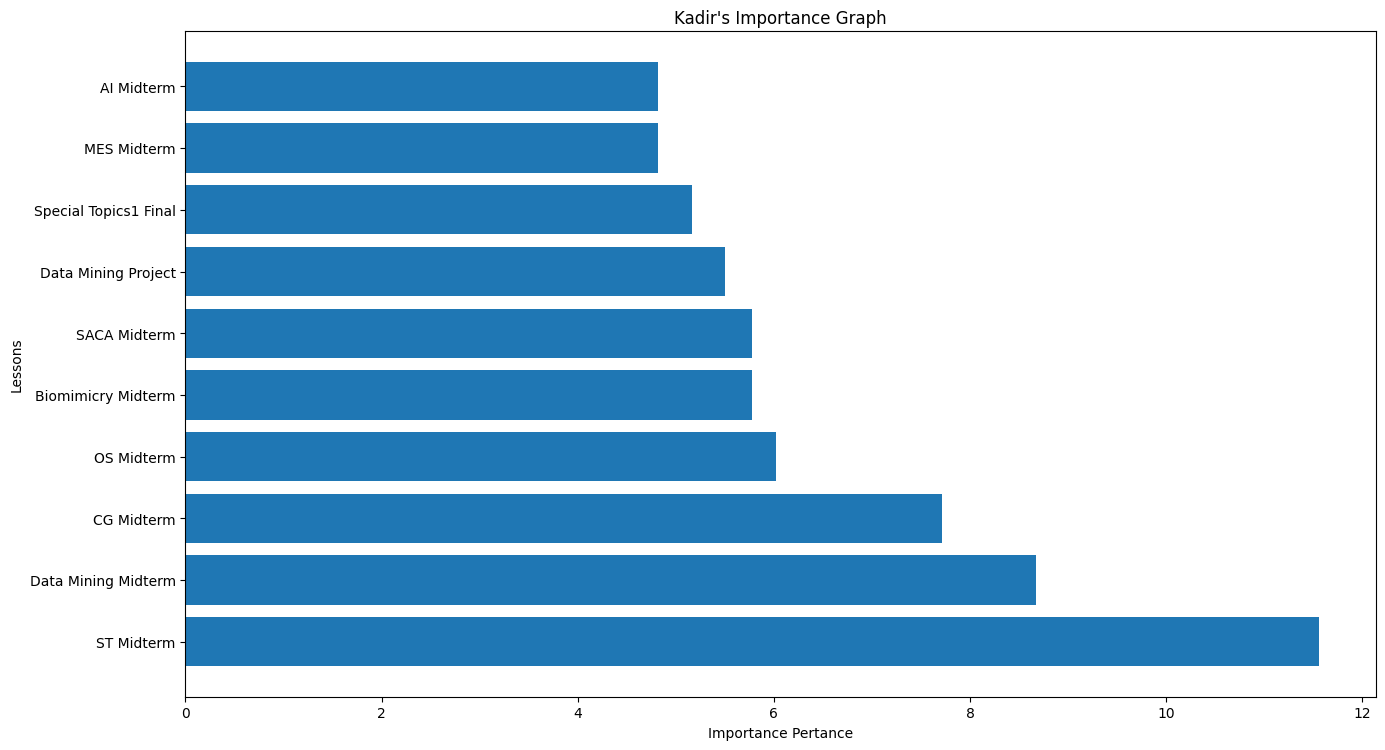

In [56]:
## Create a GUI
window=tk.Tk()
window.title('Exam Calculater')

label=tk.Label(window,text="Welcome to Exam Calculator",fg="dark orange2",font=("Arial",13))
label.grid(row=0,column=0,padx=10,pady=10)

label=tk.Label(window,text=name,fg="dark orange2",font=("Arial",13))
label.grid(row=0,column=1,padx=10,pady=10)

button0=tk.Button(window,text="Calculate & List",fg='palegreen4',font=("Arial",13),command= lambda:calculate(1))
button0.grid(row=1,column=0,padx=10,pady=10)

button1=tk.Button(window,text="Calculate & Graph",fg='palegreen4',font=("Arial",13),command= lambda:calculate(2))
button1.grid(row=1,column=1,padx=10,pady=10)

window.mainloop()